In [1]:
# https://github.com/bnsreenu/python_for_microscopists/blob/master/088-autoencoder_anomaly_V0.1.py 
# https://www.youtube.com/watch?v=u1vLJBwOFC8 

In [1]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt     

from tensorflow import keras
from sklearn.preprocessing import StandardScaler 
import plotly.graph_objects as go

from sklearn.ensemble import IsolationForest  

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed 
import seaborn as sns #visualisation
 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV 

In [3]:
# import data set from the local driver 
df=pd.read_csv('SWaT_Dataset_Normal_v0.csv', parse_dates = ['Timestamp'], index_col = 'Timestamp')
df.head(2)  

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal


In [6]:
# drop the Acutotor colomuns 
#df1=df.drop(['Timestamp',' MV101','P101','P102', ' MV201', ' P201', ' P202','P203', ' P204','P205','P206','MV301','MV302',' MV303','MV304','P301','P302','P401','P402','P403','P404','UV401','P501','P502','P601','P602','P603'],axis=1)#, inplace=True)
# drop the Acutotor colomuns 
df1=df.drop(['MV101','P101','P102', 'MV201', 'P201', 'P202','P203', 'P204','P205','P206','MV301','MV302','MV303','MV304','P301','P302','P401','P402','P403','P404','UV401','P501','P502','P601','P602','P603'],axis=1)#, inplace=True) 

#### Exploratory Data Analysis   

##### 1. Checking the types of data  
- We check here to see if the sensor data in SWaT is stored as a string or an object, and if it is, we must convert that string to integer data before plotting the data on a graph. All of the sensor data attributes in our dataset are float and integer, as seen in the following visualization:

In [7]:
# # Checking the data type
df1.dtypes  

FIT101           float64
LIT101           float64
AIT201           float64
AIT202           float64
AIT203           float64
FIT201           float64
DPIT301          float64
FIT301           float64
LIT301           float64
AIT401           float64
AIT402           float64
FIT401           float64
LIT401           float64
AIT501           float64
AIT502           float64
AIT503           float64
AIT504           float64
FIT501           float64
FIT502           float64
FIT503           float64
FIT504           float64
PIT501           float64
PIT502           float64
PIT503           float64
FIT601           float64
Normal/Attack     object
dtype: object

#### 2 Histograms
- First, we'll make a set of frequency histograms for the features in our dataset (V1–V26).

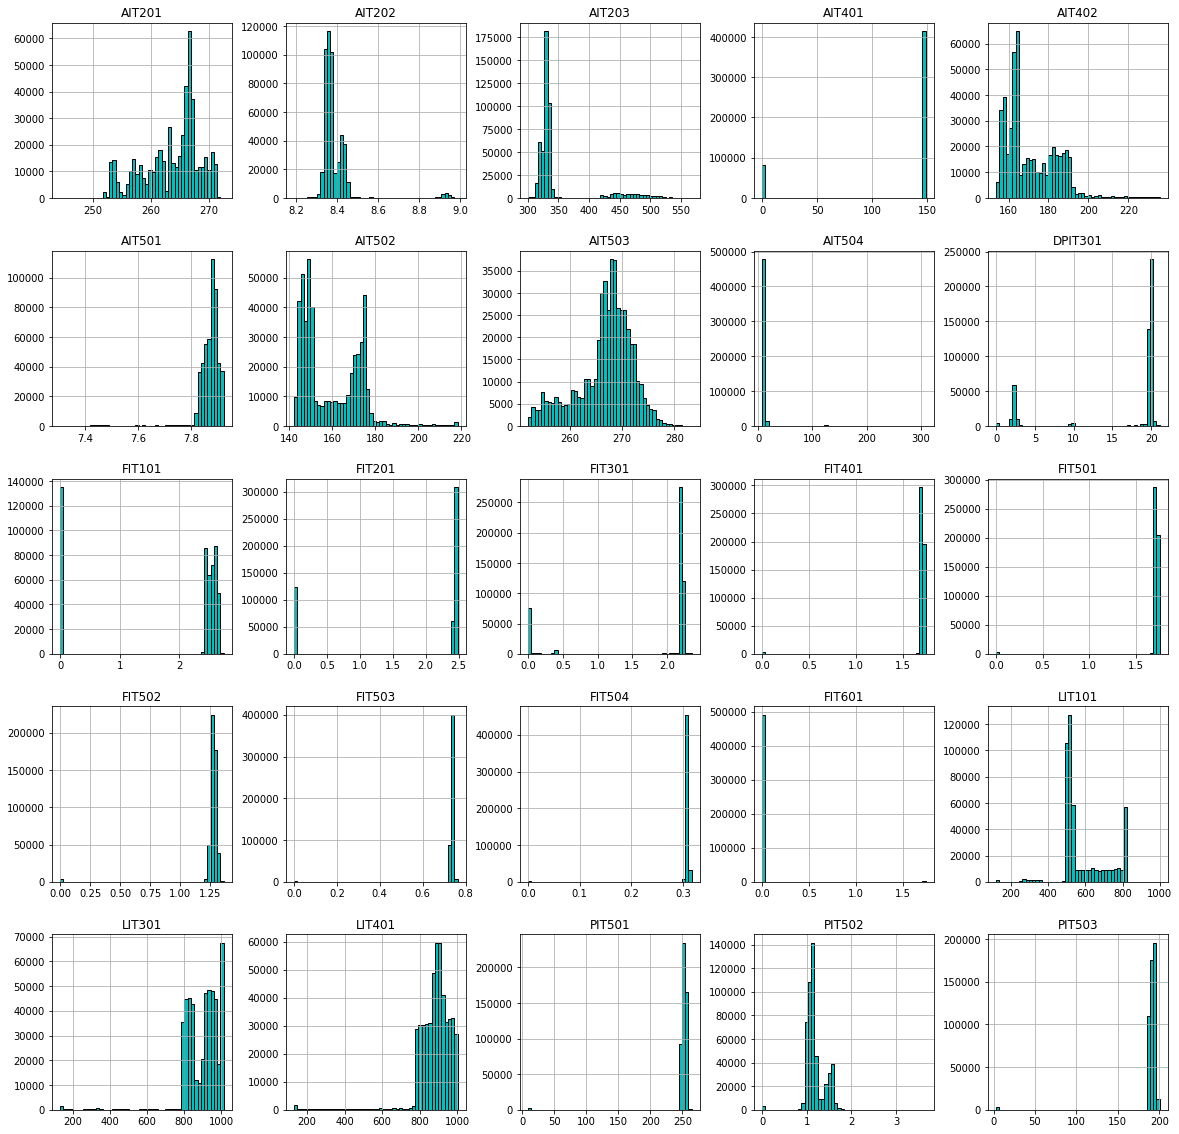

In [8]:
# create histograms on all features

df1.hist(figsize=(20,20), bins = 50, color = "c", edgecolor='black')
plt.show()  

##### 3. Dropping irrelevant columns 

In [9]:
#If there are missing entries, drop them.
df1.dropna(inplace=True)#,axis=1)  

In [10]:
# Total number of rows and columns 
df1.shape 

(496800, 26)

In [11]:
# Rows containing duplicate data
duplicate_rows_df = df1[df1.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)
 

number of duplicate rows: (9699, 26)


In [12]:
# Dropping the duplicates 
df1= df1.drop_duplicates()
df1.head(2)  

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,244.3284,8.19008,306.101,2.471278,20.79839,2.235275,327.4401,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
2015-12-22 16:00:01,2.457163,261.1879,244.3284,8.19008,306.101,2.468587,20.79839,2.234507,327.4401,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal


In [13]:
# Counting the number of rows after removing duplicates.
df1.shape

(487101, 26)

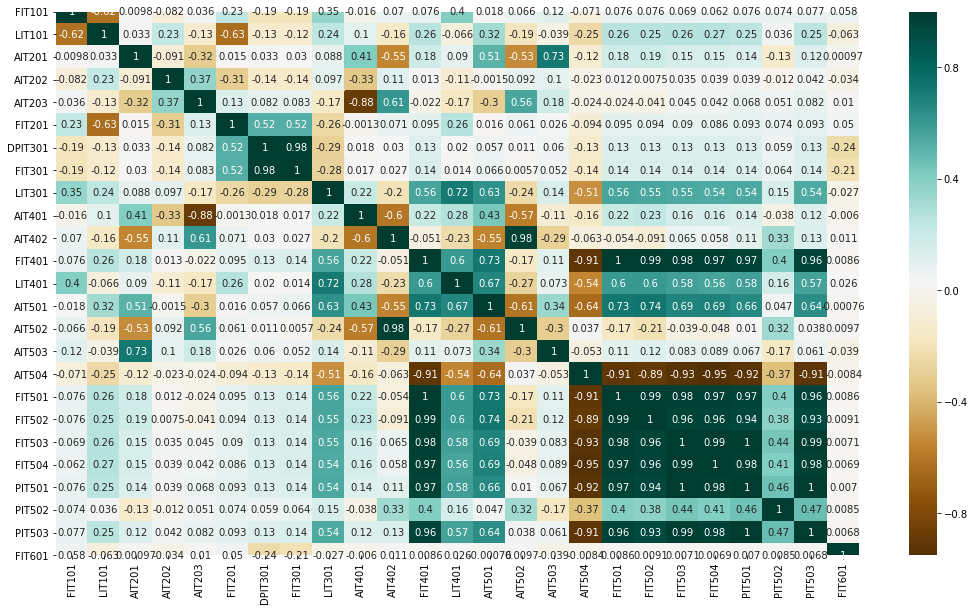

In [14]:
# Finding the relations between the variables.
plt.figure(figsize=(18,10))
c= df1.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
#c 

In [15]:
df1['Normal/Attack'] = df1['Normal/Attack'].str.replace(' ', '')  

In [16]:
#To see how the data is spread betwen Good and Bad
print(df1.groupby('Normal/Attack')['Normal/Attack'].count())

Normal/Attack
Normal    487101
Name: Normal/Attack, dtype: int64


In [17]:
# # drop the Timestamp since we are not working on timeseries instead our target is Normal/Attack columns 
# df1=df1.drop(['Timestamp'], axis=1) #, inplace=True)
# df1.head(2)
# #print(df.head())

In [18]:
# Rename the col name Normal/Attack with A  
df1.rename(columns = {'Normal/Attack':'A'}, inplace = True)
df1.head(2)

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,244.3284,8.19008,306.101,2.471278,20.79839,2.235275,327.4401,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
2015-12-22 16:00:01,2.457163,261.1879,244.3284,8.19008,306.101,2.468587,20.79839,2.234507,327.4401,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal


- As we can see,The data set is highly imbalanced. While this would be a challenge for typical classification systems, it is a natural application for outlier identification algorithms such as the Isolation Forest.  

size of class 1 (outliers): 0, size of class 0: 0


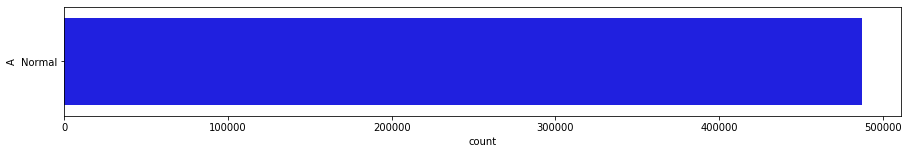

In [19]:
# Plot the balance of class labels
df_base = df1.copy()
nominal_count = len(df_base.loc[df1['A'] == 0, 'A'])
outlier_count = len(df_base.loc[df1['A'] == 1, 'A'])
print(f'size of class 1 (outliers): {outlier_count}, size of class 0: {nominal_count}')

plt.figure(figsize=(15,2))
fig = sns.countplot(y="A", data=df_base, color='b')  

In [20]:
# Convert non-numeric to numeric

df1.A[df1.A == 'Normal'] = 0 
df1.A[df1.A == 'Attack'] = 1   


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
Normal_mask = df1['A']== 0 #All Normal values to be True for good data points
Attack_mask = df1['A']== 1 #All Attack values to be False for good data points
#good_mask.head(2)

In [22]:
# # drop the target variable 
# df1.drop('A',axis=1,inplace=True)

In [23]:
df_normal = df1[Normal_mask]
df_attack = df1[Attack_mask] 
print(f"Normal count: {len(df_normal)}")
print(f"Attack count: {len(df_attack)}") 

Normal count: 487101
Attack count: 0


In [24]:
# # This is the feature vector that goes to the neural net
x_good = df_normal.values 
x_bad = df_attack.values  


array([[2.470294, 261.5804, 244.3284, ..., 4.277749, 0.000256304, 0],
       [2.457163, 261.1879, 244.3284, ..., 4.277749, 0.000256304, 0],
       [2.439548, 260.9131, 244.3284, ..., 4.277749, 0.000256304, 0],
       ...,
       [2.434744, 522.886, 262.0161, ..., 189.5027, 0.000128152, 0],
       [2.428338, 522.9252, 262.0161, ..., 189.5027, 0.000128152, 0],
       [2.427057, 522.8467, 262.0161, ..., 189.5988, 0.000128152, 0]],
      dtype=object)

In [25]:
# split the normal data with respect to test and Train 
from sklearn.model_selection import train_test_split 
x_good_train, x_good_test = train_test_split(x_good, test_size=0.25, random_state=42)

In [29]:
# Normalize using Standard Scalaer 
scaler = StandardScaler()
X_train = scaler.fit_transform(x_good_train) # normal data 75 %
X_test = scaler.transform(x_good_test) # normal data  25 %
y_test=scaler.transform(x_bad) # attack dataset 

#### Hyperparamter Tuning 
- https://practicaldatascience.co.uk/machine-learning/how-to-use-the-isolation-forest-model-for-outlier-detection 

#### Bulid Isolation Forest 

In [35]:
# Build the model using iforest with 75 % of the normal data 
iForest = IsolationForest(contamination=0.0001,max_features=10,max_samples=10,n_estimators=10,
                          bootstrap=True,verbose=2)
iForest.fit(X_train)   

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


IsolationForest(behaviour='old', bootstrap=True, contamination=0.0001,
                max_features=10, max_samples=10, n_estimators=10, n_jobs=None,
                random_state=None, verbose=2, warm_start=False)

In [36]:
# Fit the model and perform predictions using test data.

# Predict the model with test values with 25 % of the validation from normal data 
pred_iforest = iForest.predict(X_test) 
# for the attack data 
pred2_iforest=iForest.predict(y_test)  

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [37]:
# Finally, its time to get the accuracy score, in order to detect valid and Anomaly cases.
print("Normal cases accuracy:", list(pred_iforest).count(1)/pred_iforest.shape[0])
print("Attack Cases accuracy:", list(pred2_iforest).count(-1)/pred2_iforest.shape[0])   

Normal cases accuracy: 0.9999175580700345
Attack Cases accuracy: 0.0


In [38]:
# # Measure the perfomance with respect to recall and others .............
# from sklearn import metrics
# #pred = model.predict(x_bad)
# score3_rmsse = np.sqrt(metrics.mean_squared_error(pred2_iforest,y_test)) 
# print(f"Bad sample Score (RMSE): {score3_rmsse}")  

In [39]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(iForest)
 
# Load the pickled model
If_from_pickle = pickle.loads(saved_model) 
 
# Use the loaded pickled model to make predictions
y=If_from_pickle.predict(y_test)   # X_bad or y_test or  df_attack ???? to be consider 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [43]:
all_y=pd.DataFrame(y) 
#all_y 


In [44]:
# find the mean value of the pred and it is mainly similar to contaminated values 
(pred_iforest<0).mean() 

8.24419299655805e-05

In [45]:
# disply the index values where its prdection value is below 0 
abn_index=np.where(pred_iforest<0)
abn_index 

(array([11532, 22526, 32164, 57216, 57390, 72810, 74862, 94776],
       dtype=int64),)

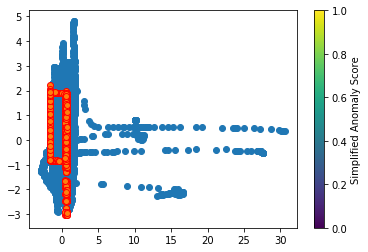

In [120]:
# Draw the data point distribution with respect to normal(blue) and attack (red) 
plt.scatter(X_test[:,14], X_test[:, 15])#, c=pred_scores2, cmap='RdBu')
plt.scatter(X_test[abn_index,0], X_test[abn_index,1], edgecolors="r")
plt.colorbar(label='Simplified Anomaly Score')  
plt.show()   

In [112]:
(pred2<0).mean()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


0.696391291380853

In [46]:
# find the predictor score 
pred_scores2 = -1*iForest.score_samples(y_test)  


In [47]:
pred_scores2

array([0.54326846, 0.53331602, 0.54326846, ..., 0.52354591, 0.49529641,
       0.48622279])

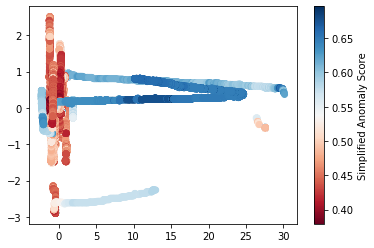

In [107]:
# Visualizing Anomaly Scores 
plt.scatter(y_test[:,14], y_test[:, 15], c=pred_scores2, cmap='RdBu')
plt.colorbar(label='Simplified Anomaly Score')
plt.show()   

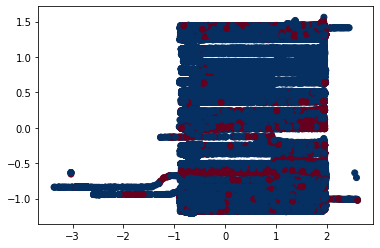

In [50]:
# Visualizing Anomalies 
plt.scatter(X_test[:, 1], X_test[:, 2], c=pred, cmap='RdBu') 

In [37]:
# find the predictor score 
pred_scores = -1*iForest.score_samples(X_test)  

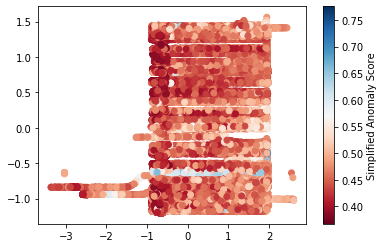

In [39]:
# Visualizing Anomaly Scores 
plt.scatter(X_test[:, 1], X_test[:, 2], c=pred_scores, cmap='RdBu')
plt.colorbar(label='Simplified Anomaly Score')
plt.show() 

#### Auto Encoder 

In [107]:
######### 
#Define the autoencoder model
#Since we're dealing with numeric values we can use only Dense layers.

from sklearn import metrics
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [108]:
model = Sequential()
model.add(Dense(10, input_dim=x_good.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(x_good.shape[1])) 
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                260       
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
 dense_2 (Dense)             (None, 10)                40        
                                                                 
 dense_3 (Dense)             (None, 25)                275       
                                                                 
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [117]:
#model.fit(x_good_train,x_good_train,verbose=1,epochs=100) 
grid=model.fit(x_good_train,x_good_train,verbose=1,epochs=100) 

Epoch 1/100
9265/9265 [==============================] - 12s 1ms/step - loss: 40.2117
Epoch 2/100
9265/9265 [==============================] - 11s 1ms/step - loss: 40.2038
Epoch 3/100
9265/9265 [==============================] - 12s 1ms/step - loss: 40.1215
Epoch 4/100
9265/9265 [==============================] - 12s 1ms/step - loss: 40.1545
Epoch 5/100
9265/9265 [==============================] - 12s 1ms/step - loss: 40.0474
Epoch 6/100
9265/9265 [==============================] - 11s 1ms/step - loss: 39.9635
Epoch 7/100
9265/9265 [==============================] - 12s 1ms/step - loss: 40.0877
Epoch 8/100
9265/9265 [==============================] - 12s 1ms/step - loss: 40.0206
Epoch 9/100
9265/9265 [==============================] - 12s 1ms/step - loss: 39.9933
Epoch 10/100
9265/9265 [==============================] - 12s 1ms/step - loss: 39.8710
Epoch 11/100
9265/9265 [==============================] - 11s 1ms/step - loss: 39.9166
Epoch 12/100
9265/9265 [============================

In [110]:
pred = model.predict(x_good_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,x_good_test))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [112]:
pred = model.predict(x_good)
score2 = np.sqrt(metrics.mean_squared_error(pred,x_good))

In [113]:
pred = model.predict(x_bad)
score3 = np.sqrt(metrics.mean_squared_error(pred,x_bad))

In [114]:
print(f"Insample Good Score (RMSE): {score1}".format(score1))
print(f"Out of Sample Good Score (RMSE): {score2}")
print(f"Bad sample Score (RMSE): {score3}") 

Insample Good Score (RMSE): 6.343819173625914
Out of Sample Good Score (RMSE): 6.317869131182272
Bad sample Score (RMSE): 56.85705990219944


In [119]:
# import pickle
 
# # Save the trained model as a pickle string.
# saved_model = pickle.dumps(grid)
 
# # Load the pickled model
# knn_from_pickle = pickle.loads(saved_model)
 
# # Use the loaded pickled model to make predictions
# y=knn_from_pickle.predict(x_bad) 

In [ ]:
y